In [1]:
# Import relevant items
import pandas as pd
import numpy as np
import seaborn as sns
import math
import datetime as dt
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline


# Import CSV file into a dataframe
df = pd.read_csv('convertedcsv.csv')
df

,site,name,dateTimeUTC,month,hour,humidity (%),precipitation (mm),pressure (kPa),radiation (W/m2),temperature (oC),winddirection,windspeed (m/s),traffic,pollution
0,TA00216,Makerere Synoptic,01/02/19 00:00,2,0,83,0.00,87.59,0.00,19.92,S,0.52,0.012,0.24
1,TA00216,Makerere Synoptic,01/02/19 01:00,2,1,90,0.02,87.60,0.00,19.76,W,0.56,0.013,0.25
2,TA00216,Makerere Synoptic,01/02/19 02:00,2,2,93,0.03,87.63,0.00,19.14,S,0.54,0.014,0.28
3,TA00216,Makerere Synoptic,01/02/19 03:00,2,3,92,0.02,87.68,0.08,19.08,SW,0.57,0.012,0.24
4,TA00216,Makerere Synoptic,01/02/19 04:00,2,4,93,0.02,87.72,14.18,18.91,S,0.62,0.029,0.32
5,TA00216,Makerere Synoptic,01/02/19 05:00,2,5,89,0.00,87.81,51.83,20.33,S,0.50,0.040,0.42
6,TA00216,Makerere Synoptic,01/02/19 06:00,2,6,77,0.00,87.88,304.40,23.88,SE,0.51,0.280,0.51
7,TA00216,Makerere Synoptic,01/02/19 07:00,2,7,61,0.00,87.90,493.10,29.17,SE,2.79,0.380,0.52
8,TA00216,Makerere Synoptic,01/02/19 08:00,2,8,58,0.00,87.88,550.48,29.99,SE,3.46,0.400,0.71
9,TA00216,Makerere Synoptic,01/02/19 09:00,2,9,61,0.00,87.79,440.25,29.55,SE,3.43,0.800,0.72


In [2]:
# dropping unnecessary stuff
dfclean = df.drop(df.columns[[0, 1, 7, 8, 10]], axis=1)
dfclean

,dateTimeUTC,month,hour,humidity (%),precipitation (mm),temperature (oC),windspeed (m/s),traffic,pollution
0,01/02/19 00:00,2,0,83,0.00,19.92,0.52,0.012,0.24
1,01/02/19 01:00,2,1,90,0.02,19.76,0.56,0.013,0.25
2,01/02/19 02:00,2,2,93,0.03,19.14,0.54,0.014,0.28
3,01/02/19 03:00,2,3,92,0.02,19.08,0.57,0.012,0.24
4,01/02/19 04:00,2,4,93,0.02,18.91,0.62,0.029,0.32
5,01/02/19 05:00,2,5,89,0.00,20.33,0.50,0.040,0.42
6,01/02/19 06:00,2,6,77,0.00,23.88,0.51,0.280,0.51
7,01/02/19 07:00,2,7,61,0.00,29.17,2.79,0.380,0.52
8,01/02/19 08:00,2,8,58,0.00,29.99,3.46,0.400,0.71
9,01/02/19 09:00,2,9,61,0.00,29.55,3.43,0.800,0.72


In [3]:
# changing to proper date format
dfclean['dateTimeUTC'] = pd.to_datetime(dfclean['dateTimeUTC'])
dfclean = dfclean.rename(columns={"humidity (%)": "humidity"})
dfclean = dfclean.rename(columns={"precipitation (mm)": "precipitation"})
dfclean = dfclean.rename(columns={"temperature (oC)": "temp_cel"})
dfclean = dfclean.rename(columns={"windspeed (m/s)": "windspeed"})
dfclean.dtypes

dateTimeUTC      datetime64[ns]
month                     int64
hour                      int64
humidity                  int64
precipitation           float64
temp_cel                float64
windspeed               float64
traffic                 float64
pollution               float64
dtype: object

In [4]:
for i in range(1, 6):
    dfclean['traffic_'+str(i)] = dfclean.traffic.shift(periods=i)
    dfclean['humidity_'+str(i)] = dfclean.humidity.shift(periods=i)
    dfclean['precipitation_'+str(i)] = dfclean.precipitation.shift(periods=i)
    dfclean['temp_cel_'+str(i)] = dfclean.temp_cel.shift(periods=i)
    dfclean['windspeed_'+str(i)] = dfclean.windspeed.shift(periods=i)
    dfclean['pollution_'+str(i)] = dfclean.pollution.shift(periods=i)


In [5]:
dfclean

,dateTimeUTC,month,hour,humidity,precipitation,temp_cel,windspeed,traffic,pollution,traffic_1,...,precipitation_4,temp_cel_4,windspeed_4,pollution_4,traffic_5,humidity_5,precipitation_5,temp_cel_5,windspeed_5,pollution_5
0,2019-01-02 00:00:00,2,0,83,0.00,19.92,0.52,0.012,0.24,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-02 01:00:00,2,1,90,0.02,19.76,0.56,0.013,0.25,0.012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-02 02:00:00,2,2,93,0.03,19.14,0.54,0.014,0.28,0.013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-02 03:00:00,2,3,92,0.02,19.08,0.57,0.012,0.24,0.014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-02 04:00:00,2,4,93,0.02,18.91,0.62,0.029,0.32,0.012,...,0.00,19.92,0.52,0.24,NaN,NaN,NaN,NaN,NaN,NaN
5,2019-01-02 05:00:00,2,5,89,0.00,20.33,0.50,0.040,0.42,0.029,...,0.02,19.76,0.56,0.25,0.012,83.0,0.00,19.92,0.52,0.24
6,2019-01-02 06:00:00,2,6,77,0.00,23.88,0.51,0.280,0.51,0.040,...,0.03,19.14,0.54,0.28,0.013,90.0,0.02,19.76,0.56,0.25
7,2019-01-02 07:00:00,2,7,61,0.00,29.17,2.79,0.380,0.52,0.280,...,0.02,19.08,0.57,0.24,0.014,93.0,0.03,19.14,0.54,0.28
8,2019-01-02 08:00:00,2,8,58,0.00,29.99,3.46,0.400,0.71,0.380,...,0.02,18.91,0.62,0.32,0.012,92.0,0.02,19.08,0.57,0.24
9,2019-01-02 09:00:00,2,9,61,0.00,29.55,3.43,0.800,0.72,0.400,...,0.00,20.33,0.50,0.42,0.029,93.0,0.02,18.91,0.62,0.32


/home/vijeta/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


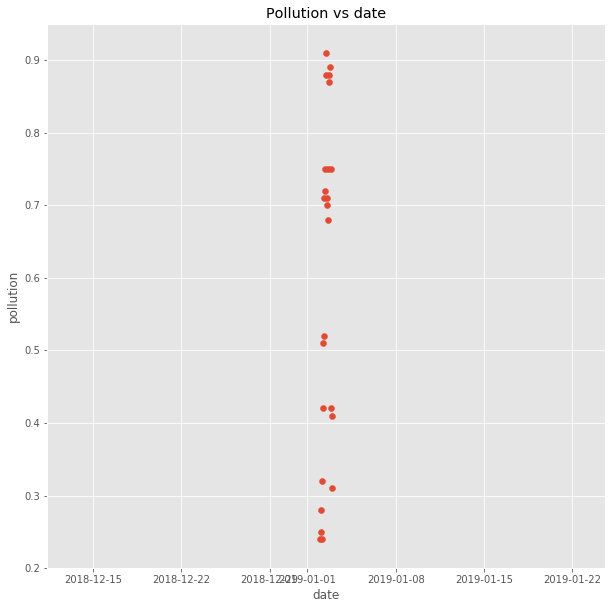

In [6]:
# pollution daywise
plt.figure(figsize=[10,10])
x = dfclean['dateTimeUTC']
y = dfclean ['pollution']
plt.scatter(x,y)
plt.xlabel('date')
plt.ylabel('pollution')
plt.title('Pollution vs date')
plt.show()

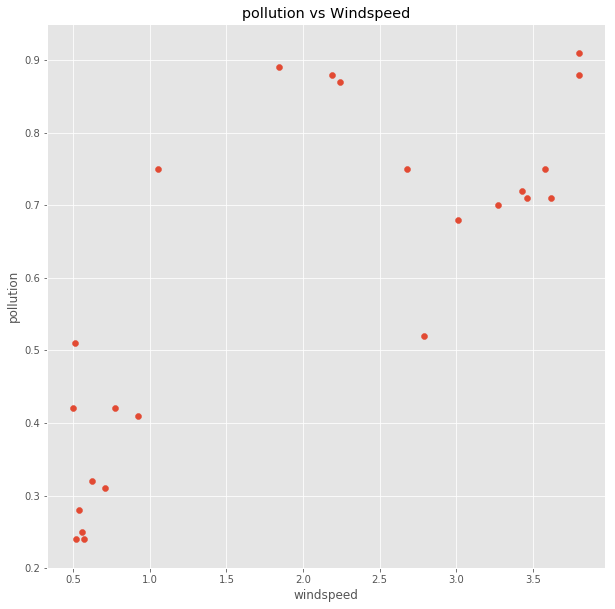

In [7]:
# pollution windspeed
plt.figure(figsize=[10,10])
x = dfclean['windspeed']
y = dfclean ['pollution']
plt.scatter(x,y)
plt.xlabel('windspeed')
plt.ylabel('pollution')
plt.title('pollution vs Windspeed')
plt.show()

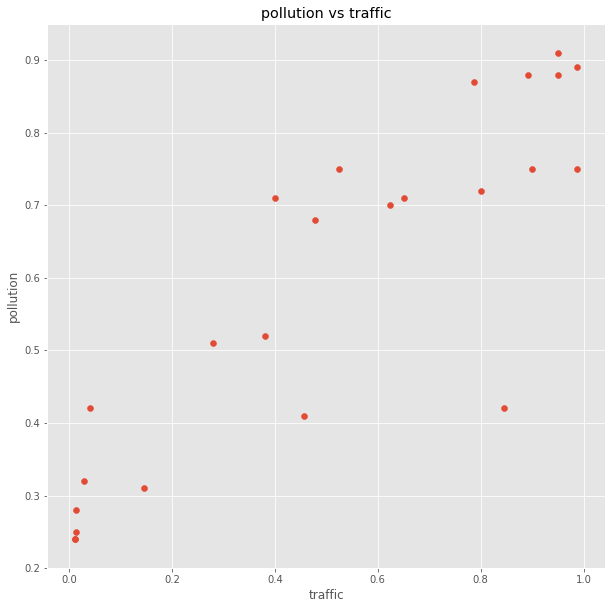

In [8]:
# pollution traffic
plt.figure(figsize=[10,10])
x = dfclean['traffic']
y = dfclean ['pollution']
plt.scatter(x,y)
plt.xlabel('traffic')
plt.ylabel('pollution')
plt.title('pollution vs traffic')
plt.show()

In [9]:
# handling Nans
print(dfclean[dfclean.isnull().any(axis=1)].shape)
# Check if pollution has NaNs
print("Pollution contains nulls:", dfclean.pollution.isnull().values.any())


(5, 39)
Pollution contains nulls: False


In [10]:
df = dfclean.dropna()
df

,dateTimeUTC,month,hour,humidity,precipitation,temp_cel,windspeed,traffic,pollution,traffic_1,...,precipitation_4,temp_cel_4,windspeed_4,pollution_4,traffic_5,humidity_5,precipitation_5,temp_cel_5,windspeed_5,pollution_5
5,2019-01-02 05:00:00,2,5,89,0.00,20.33,0.50,0.040,0.42,0.029,...,0.02,19.76,0.56,0.25,0.012,83.0,0.00,19.92,0.52,0.24
6,2019-01-02 06:00:00,2,6,77,0.00,23.88,0.51,0.280,0.51,0.040,...,0.03,19.14,0.54,0.28,0.013,90.0,0.02,19.76,0.56,0.25
7,2019-01-02 07:00:00,2,7,61,0.00,29.17,2.79,0.380,0.52,0.280,...,0.02,19.08,0.57,0.24,0.014,93.0,0.03,19.14,0.54,0.28
8,2019-01-02 08:00:00,2,8,58,0.00,29.99,3.46,0.400,0.71,0.380,...,0.02,18.91,0.62,0.32,0.012,92.0,0.02,19.08,0.57,0.24
9,2019-01-02 09:00:00,2,9,61,0.00,29.55,3.43,0.800,0.72,0.400,...,0.00,20.33,0.50,0.42,0.029,93.0,0.02,18.91,0.62,0.32
10,2019-01-02 10:00:00,2,10,57,0.00,30.43,3.58,0.900,0.75,0.800,...,0.00,23.88,0.51,0.51,0.040,89.0,0.00,20.33,0.50,0.42
11,2019-01-02 11:00:00,2,11,52,0.00,30.85,3.80,0.950,0.88,0.900,...,0.00,29.17,2.79,0.52,0.280,77.0,0.00,23.88,0.51,0.51
12,2019-01-02 12:00:00,2,12,53,0.00,30.89,3.80,0.950,0.91,0.950,...,0.00,29.99,3.46,0.71,0.380,61.0,0.00,29.17,2.79,0.52
13,2019-01-02 13:00:00,2,13,51,0.00,30.67,3.62,0.650,0.71,0.950,...,0.00,29.55,3.43,0.72,0.400,58.0,0.00,29.99,3.46,0.71
14,2019-01-02 14:00:00,2,14,55,0.00,30.09,3.27,0.624,0.70,0.650,...,0.00,30.43,3.58,0.75,0.800,61.0,0.00,29.55,3.43,0.72


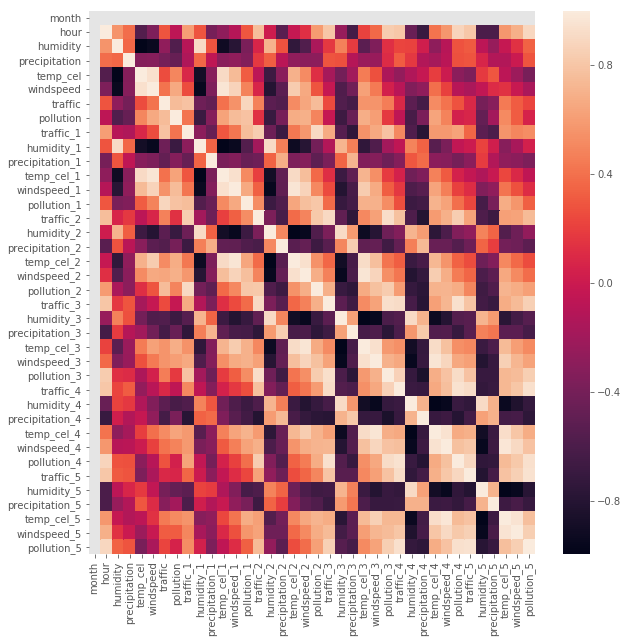

In [11]:
#correlation heatmap
plt.figure(figsize=[10,10])
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [12]:
#creating day of the week feature
df['day_week'] = df['dateTimeUTC'].dt.weekday_name
df

/home/vijeta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,dateTimeUTC,month,hour,humidity,precipitation,temp_cel,windspeed,traffic,pollution,traffic_1,...,temp_cel_4,windspeed_4,pollution_4,traffic_5,humidity_5,precipitation_5,temp_cel_5,windspeed_5,pollution_5,day_week
5,2019-01-02 05:00:00,2,5,89,0.00,20.33,0.50,0.040,0.42,0.029,...,19.76,0.56,0.25,0.012,83.0,0.00,19.92,0.52,0.24,Wednesday
6,2019-01-02 06:00:00,2,6,77,0.00,23.88,0.51,0.280,0.51,0.040,...,19.14,0.54,0.28,0.013,90.0,0.02,19.76,0.56,0.25,Wednesday
7,2019-01-02 07:00:00,2,7,61,0.00,29.17,2.79,0.380,0.52,0.280,...,19.08,0.57,0.24,0.014,93.0,0.03,19.14,0.54,0.28,Wednesday
8,2019-01-02 08:00:00,2,8,58,0.00,29.99,3.46,0.400,0.71,0.380,...,18.91,0.62,0.32,0.012,92.0,0.02,19.08,0.57,0.24,Wednesday
9,2019-01-02 09:00:00,2,9,61,0.00,29.55,3.43,0.800,0.72,0.400,...,20.33,0.50,0.42,0.029,93.0,0.02,18.91,0.62,0.32,Wednesday
10,2019-01-02 10:00:00,2,10,57,0.00,30.43,3.58,0.900,0.75,0.800,...,23.88,0.51,0.51,0.040,89.0,0.00,20.33,0.50,0.42,Wednesday
11,2019-01-02 11:00:00,2,11,52,0.00,30.85,3.80,0.950,0.88,0.900,...,29.17,2.79,0.52,0.280,77.0,0.00,23.88,0.51,0.51,Wednesday
12,2019-01-02 12:00:00,2,12,53,0.00,30.89,3.80,0.950,0.91,0.950,...,29.99,3.46,0.71,0.380,61.0,0.00,29.17,2.79,0.52,Wednesday
13,2019-01-02 13:00:00,2,13,51,0.00,30.67,3.62,0.650,0.71,0.950,...,29.55,3.43,0.72,0.400,58.0,0.00,29.99,3.46,0.71,Wednesday
14,2019-01-02 14:00:00,2,14,55,0.00,30.09,3.27,0.624,0.70,0.650,...,30.43,3.58,0.75,0.800,61.0,0.00,29.55,3.43,0.72,Wednesday


In [13]:
df['day_week_cat'] = df.day_week.astype("category").cat.codes

/home/vijeta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
df.dtypes

dateTimeUTC        datetime64[ns]
month                       int64
hour                        int64
humidity                    int64
precipitation             float64
temp_cel                  float64
windspeed                 float64
traffic                   float64
pollution                 float64
traffic_1                 float64
humidity_1                float64
precipitation_1           float64
temp_cel_1                float64
windspeed_1               float64
pollution_1               float64
traffic_2                 float64
humidity_2                float64
precipitation_2           float64
temp_cel_2                float64
windspeed_2               float64
pollution_2               float64
traffic_3                 float64
humidity_3                float64
precipitation_3           float64
temp_cel_3                float64
windspeed_3               float64
pollution_3               float64
traffic_4                 float64
humidity_4                float64
precipitation_

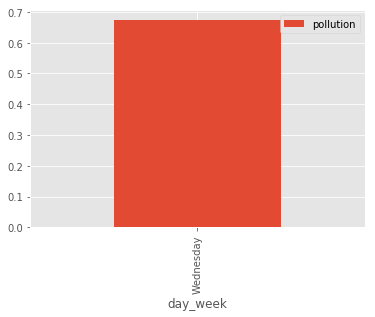

In [15]:
load = df[['pollution', 'day_week']].groupby(['day_week']).mean()
load.plot(kind='bar')

In [16]:
# dropping the day of the week
df = df.drop(labels='day_week', axis=1)
df.head()

,dateTimeUTC,month,hour,humidity,precipitation,temp_cel,windspeed,traffic,pollution,traffic_1,...,temp_cel_4,windspeed_4,pollution_4,traffic_5,humidity_5,precipitation_5,temp_cel_5,windspeed_5,pollution_5,day_week_cat
5,2019-01-02 05:00:00,2,5,89,0.0,20.33,0.50,0.04,0.42,0.029,...,19.76,0.56,0.25,0.012,83.0,0.00,19.92,0.52,0.24,0
6,2019-01-02 06:00:00,2,6,77,0.0,23.88,0.51,0.28,0.51,0.040,...,19.14,0.54,0.28,0.013,90.0,0.02,19.76,0.56,0.25,0
7,2019-01-02 07:00:00,2,7,61,0.0,29.17,2.79,0.38,0.52,0.280,...,19.08,0.57,0.24,0.014,93.0,0.03,19.14,0.54,0.28,0
8,2019-01-02 08:00:00,2,8,58,0.0,29.99,3.46,0.40,0.71,0.380,...,18.91,0.62,0.32,0.012,92.0,0.02,19.08,0.57,0.24,0
9,2019-01-02 09:00:00,2,9,61,0.0,29.55,3.43,0.80,0.72,0.400,...,20.33,0.50,0.42,0.029,93.0,0.02,18.91,0.62,0.32,0


In [17]:
df = df.drop(['dateTimeUTC'], axis=1)
df

,month,hour,humidity,precipitation,temp_cel,windspeed,traffic,pollution,traffic_1,humidity_1,...,temp_cel_4,windspeed_4,pollution_4,traffic_5,humidity_5,precipitation_5,temp_cel_5,windspeed_5,pollution_5,day_week_cat
5,2,5,89,0.00,20.33,0.50,0.040,0.42,0.029,93.0,...,19.76,0.56,0.25,0.012,83.0,0.00,19.92,0.52,0.24,0
6,2,6,77,0.00,23.88,0.51,0.280,0.51,0.040,89.0,...,19.14,0.54,0.28,0.013,90.0,0.02,19.76,0.56,0.25,0
7,2,7,61,0.00,29.17,2.79,0.380,0.52,0.280,77.0,...,19.08,0.57,0.24,0.014,93.0,0.03,19.14,0.54,0.28,0
8,2,8,58,0.00,29.99,3.46,0.400,0.71,0.380,61.0,...,18.91,0.62,0.32,0.012,92.0,0.02,19.08,0.57,0.24,0
9,2,9,61,0.00,29.55,3.43,0.800,0.72,0.400,58.0,...,20.33,0.50,0.42,0.029,93.0,0.02,18.91,0.62,0.32,0
10,2,10,57,0.00,30.43,3.58,0.900,0.75,0.800,61.0,...,23.88,0.51,0.51,0.040,89.0,0.00,20.33,0.50,0.42,0
11,2,11,52,0.00,30.85,3.80,0.950,0.88,0.900,57.0,...,29.17,2.79,0.52,0.280,77.0,0.00,23.88,0.51,0.51,0
12,2,12,53,0.00,30.89,3.80,0.950,0.91,0.950,52.0,...,29.99,3.46,0.71,0.380,61.0,0.00,29.17,2.79,0.52,0
13,2,13,51,0.00,30.67,3.62,0.650,0.71,0.950,53.0,...,29.55,3.43,0.72,0.400,58.0,0.00,29.99,3.46,0.71,0
14,2,14,55,0.00,30.09,3.27,0.624,0.70,0.650,51.0,...,30.43,3.58,0.75,0.800,61.0,0.00,29.55,3.43,0.72,0


In [18]:
df.dtypes

month                int64
hour                 int64
humidity             int64
precipitation      float64
temp_cel           float64
windspeed          float64
traffic            float64
pollution          float64
traffic_1          float64
humidity_1         float64
precipitation_1    float64
temp_cel_1         float64
windspeed_1        float64
pollution_1        float64
traffic_2          float64
humidity_2         float64
precipitation_2    float64
temp_cel_2         float64
windspeed_2        float64
pollution_2        float64
traffic_3          float64
humidity_3         float64
precipitation_3    float64
temp_cel_3         float64
windspeed_3        float64
pollution_3        float64
traffic_4          float64
humidity_4         float64
precipitation_4    float64
temp_cel_4         float64
windspeed_4        float64
pollution_4        float64
traffic_5          float64
humidity_5         float64
precipitation_5    float64
temp_cel_5         float64
windspeed_5        float64
p

In [19]:
y = df['pollution']
X = df.drop(['pollution'], axis=1)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1234)

In [21]:
X_train.shape, y_train.shape

((13, 38), (13,))

In [22]:
X_test.shape, y_test.shape

((6, 38), (6,))

In [23]:
X.columns

Index(['month', 'hour', 'humidity', 'precipitation', 'temp_cel', 'windspeed',
       'traffic', 'traffic_1', 'humidity_1', 'precipitation_1', 'temp_cel_1',
       'windspeed_1', 'pollution_1', 'traffic_2', 'humidity_2',
       'precipitation_2', 'temp_cel_2', 'windspeed_2', 'pollution_2',
       'traffic_3', 'humidity_3', 'precipitation_3', 'temp_cel_3',
       'windspeed_3', 'pollution_3', 'traffic_4', 'humidity_4',
       'precipitation_4', 'temp_cel_4', 'windspeed_4', 'pollution_4',
       'traffic_5', 'humidity_5', 'precipitation_5', 'temp_cel_5',
       'windspeed_5', 'pollution_5', 'day_week_cat'],
      dtype='object')

# Algorithms ###

### Linear Regression ###

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Create linear regression object
regr = LinearRegression()
# Train the model using the training sets
regr.fit(X_train, y_train)
# Make predictions using the testing set
lin_pred = regr.predict(X_test)
linear_regression_score = regr.score(X_test, y_test)
print(linear_regression_score)

from math import sqrt
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, lin_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, lin_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, lin_pred))

-0.21970776762971567
Coefficients: 
 [-1.28543010e-15  1.78774675e-02 -6.20426946e-03  4.34380936e-04
  1.73527132e-02 -2.67223087e-02  1.17193104e-01  1.58324516e-03
 -2.14837711e-04 -1.48151582e-03 -3.90899035e-02  5.60969961e-02
  5.93535577e-02 -5.25739613e-02 -3.27558343e-02 -3.02298125e-04
 -6.60774051e-02  6.13903586e-02 -1.42001892e-02 -6.30700101e-02
  1.42082093e-02 -1.04305604e-03 -5.55604534e-02 -8.25814296e-02
 -1.82511532e-02 -9.50578947e-02 -3.74901162e-02  2.87310723e-04
  1.10175252e-02 -2.87205254e-02 -1.90896308e-02 -4.04829755e-02
  1.76358543e-02  1.81467903e-03  3.37992235e-02 -4.23826466e-02
 -3.75998313e-02  0.00000000e+00]
Root mean squared error: 0.14
Mean absolute error: 0.14
R-squared: -0.22


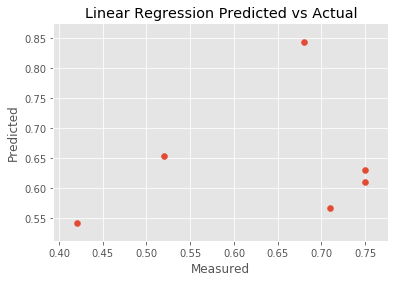

In [63]:
plt.scatter(y_test, lin_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Linear Regression Predicted vs Actual')
plt.show()

### Perceptron/Neural Network ###

In [64]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create MLPRegressor object
mlp = MLPRegressor(random_state=1234)
# Train the model using the training sets
mlp.fit(X_train, y_train)
# Score the model
neural_network_regression_score = mlp.score(X_test, y_test)
print(neural_network_regression_score)

# Make predictions using the testing set
nnr_pred = mlp.predict(X_test)

# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, nnr_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, nnr_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, nnr_pred))

-85.37797749066102
Root mean squared error: 1.16
Mean absolute error: 1.09
R-squared: -85.38


/home/vijeta/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


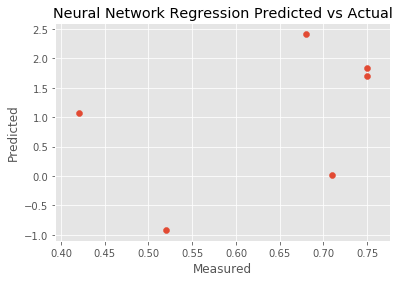

In [65]:
plt.scatter(y_test, nnr_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Neural Network Regression Predicted vs Actual')
plt.show()

### Lasso

In [54]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train, y_train)
# Score the model
lasso_score = lasso.score(X_test, y_test)
print(lasso_score)
# Make predictions using the testing set
lasso_pred = lasso.predict(X_test)
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, lasso_pred)))

0.2174518738889365
Root mean squared error: 0.11


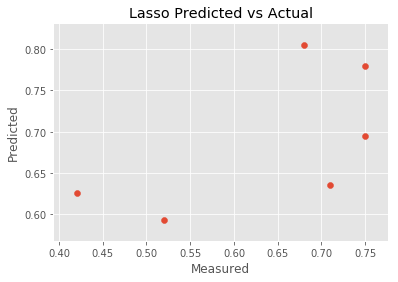

In [30]:
plt.scatter(y_test, lasso_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Lasso Predicted vs Actual')
plt.show()

### Elastic

In [53]:
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet()
elasticnet.fit(X_train, y_train)
elasticnet_score = elasticnet.score(X_test, y_test)
print(elasticnet_score)
elasticnet_pred = elasticnet.predict(X_test)

# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, elasticnet_pred)))

0.1042159514261557
Root mean squared error: 0.12


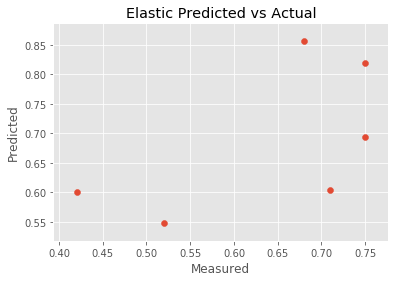

In [32]:
plt.scatter(y_test, elasticnet_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Elastic Predicted vs Actual')
plt.show()

### Random Forest Regression

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create Random Forrest Regressor object
regr_rf = RandomForestRegressor(n_estimators=200, random_state=1234)

# Train the model using the training sets
regr_rf.fit(X_train, y_train)

# Score the model
decision_forest_score = regr_rf.score(X_test, y_test)
print(decision_forest_score)

# Make predictions using the testing set
regr_rf_pred = regr_rf.predict(X_test)
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, regr_rf_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, regr_rf_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, regr_rf_pred))

0.3939221518987379
Root mean squared error: 0.10
Mean absolute error: 0.07
R-squared: 0.39


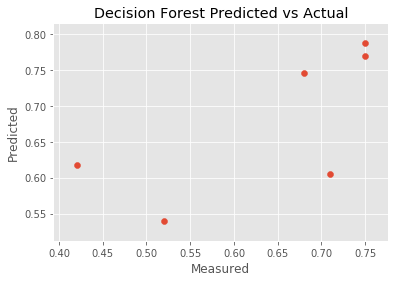

In [34]:
plt.scatter(y_test, regr_rf_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Decision Forest Predicted vs Actual')
plt.show()

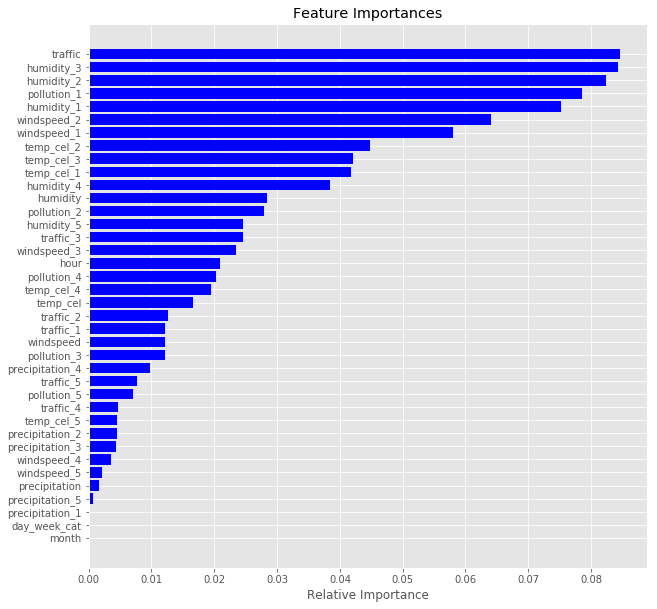

In [36]:
features = X.columns
importances = regr_rf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=[10,10])
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

### Extra Tree Regression

In [37]:
from sklearn.ensemble import ExtraTreesRegressor

extra_tree = ExtraTreesRegressor(n_estimators=200, random_state=1234)
extra_tree.fit(X_train, y_train)
extratree_score = extra_tree.score(X_test, y_test)
print(extratree_score)
extratree_pred = extra_tree.predict(X_test)
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, extratree_pred)))

0.4686142627919462
Root mean squared error: 0.09


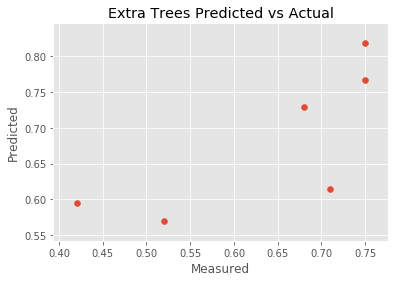

In [38]:
plt.scatter(y_test, extratree_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Extra Trees Predicted vs Actual')
plt.show()

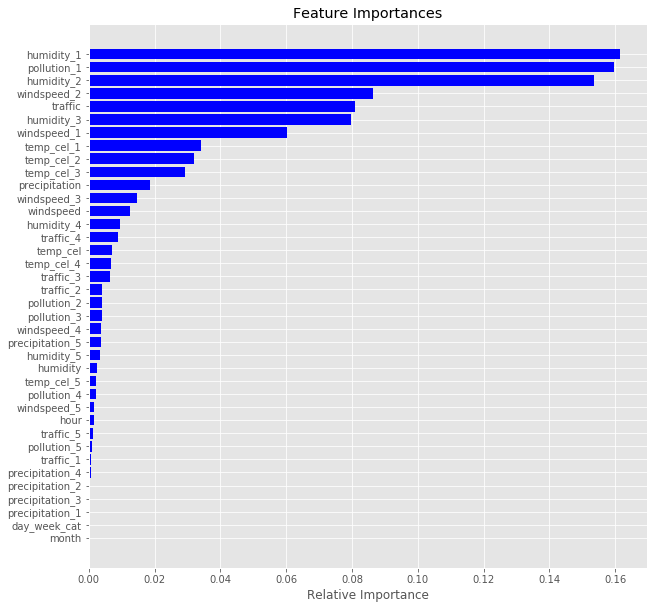

In [43]:
features = X.columns
importances = extra_tree.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=[10,10])
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

### Decision Tree + AdaBoost

In [66]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create Decision Tree Regressor object
tree_1 = DecisionTreeRegressor(random_state=1234)

tree_2 = AdaBoostRegressor(DecisionTreeRegressor(), n_estimators=200, learning_rate=.1, random_state=1234)
# Train the model using the training sets
tree_1.fit(X_train, y_train)
tree_2.fit(X_train, y_train)
# Score the decision tree model
decision_tree_score = tree_1.score(X_test, y_test)
print(decision_tree_score)
# Score the boosted decision tree model
boosted_tree_score = tree_2.score(X_test, y_test)
print(boosted_tree_score)
# Make predictions using the testing set
tree_1_pred = tree_1.predict(X_test)
tree_2_pred = tree_2.predict(X_test)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, tree_2_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, tree_2_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, tree_2_pred))

-1.2121590301301484
-0.004457122481725362
Coefficients: 
 [-1.28543010e-15  1.78774675e-02 -6.20426946e-03  4.34380936e-04
  1.73527132e-02 -2.67223087e-02  1.17193104e-01  1.58324516e-03
 -2.14837711e-04 -1.48151582e-03 -3.90899035e-02  5.60969961e-02
  5.93535577e-02 -5.25739613e-02 -3.27558343e-02 -3.02298125e-04
 -6.60774051e-02  6.13903586e-02 -1.42001892e-02 -6.30700101e-02
  1.42082093e-02 -1.04305604e-03 -5.55604534e-02 -8.25814296e-02
 -1.82511532e-02 -9.50578947e-02 -3.74901162e-02  2.87310723e-04
  1.10175252e-02 -2.87205254e-02 -1.90896308e-02 -4.04829755e-02
  1.76358543e-02  1.81467903e-03  3.37992235e-02 -4.23826466e-02
 -3.75998313e-02  0.00000000e+00]
Root mean squared error: 0.13
Mean absolute error: 0.07
R-squared: -0.00


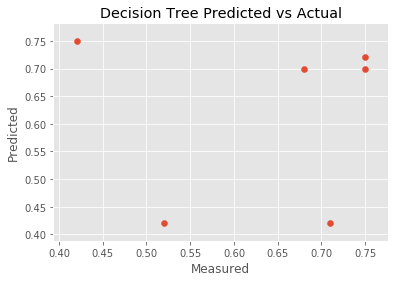

In [67]:
plt.scatter(y_test, tree_1_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Decision Tree Predicted vs Actual')
plt.show()

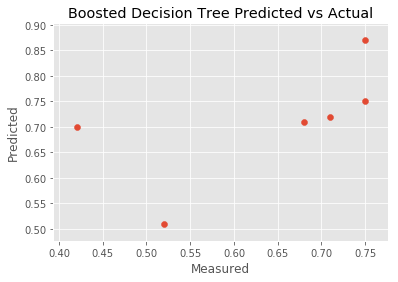

In [68]:
plt.scatter(y_test, tree_2_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Boosted Decision Tree Predicted vs Actual')
plt.show()

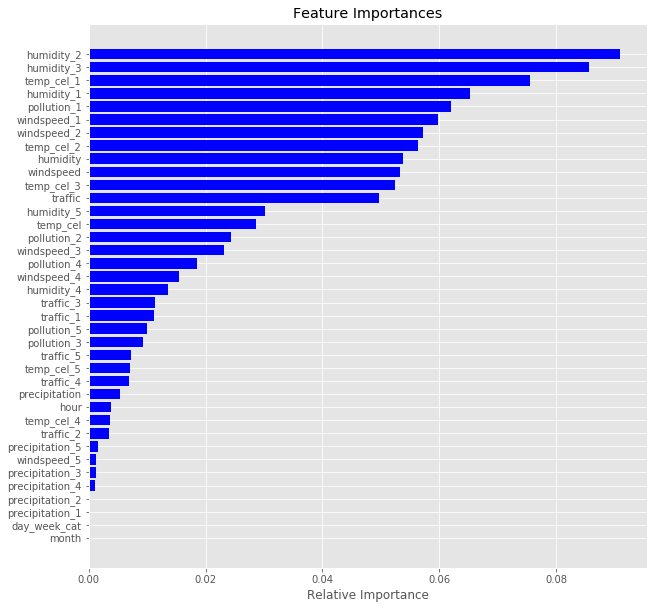

In [69]:
features = X.columns
importances = tree_2.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=[10,10])
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

### XGBoost

In [72]:
from xgboost.sklearn import XGBRegressor

#Fitting XGB regressor 
xboost = XGBRegressor(n_estimators=200, random_state = 1234)
xboost.fit(X_train, y_train)
xgb_score = xboost.score(X_test, y_test)
print(xgb_score)

#Predict 
xboost_pred = xboost.predict(X_test)
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, xboost_pred)))

[17:54:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.45225220972475366
Root mean squared error: 0.09


/home/vijeta/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


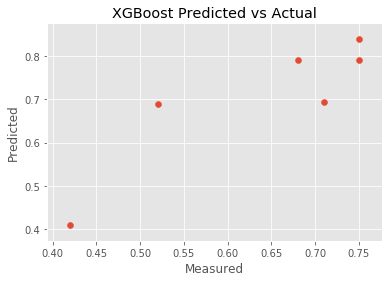

In [73]:
plt.scatter(y_test, xboost_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('XGBoost Predicted vs Actual')
plt.show()

# Evaluation

In [74]:
print("Scores:")
print("Linear regression score: ", linear_regression_score)
print("Neural network regression score: ", neural_network_regression_score)
print("Lasso regression score: ", lasso_score)
print("ElasticNet regression score: ", elasticnet_score)
print("Decision forest score: ", decision_forest_score)
print("Extra Trees score: ", extratree_score)
print("Boosted decision tree score: ", boosted_tree_score)
print("XGBoost score:", xgb_score)
print("\n")
print("RMSE:")
print("Linear regression RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, lin_pred)))
print("Neural network RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, nnr_pred)))
print("Lasso RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, lasso_pred)))
print("ElasticNet RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, elasticnet_pred)))
print("Decision forest RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, regr_rf_pred)))
print("Extra Trees RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, extratree_pred)))
print("Boosted decision tree RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, tree_2_pred)))
print("XGBoost RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, xboost_pred)))

Scores:
Linear regression score:  -0.21970776762971567
Neural network regression score:  -85.37797749066102
Lasso regression score:  0.2174518738889365
ElasticNet regression score:  0.1042159514261557
Decision forest score:  0.3939221518987379
Extra Trees score:  0.4686142627919462
Boosted decision tree score:  -0.004457122481725362
XGBoost score: 0.45225220972475366


RMSE:
Linear regression RMSE: 0.14
Neural network RMSE: 1.16
Lasso RMSE: 0.11
ElasticNet RMSE: 0.12
Decision forest RMSE: 0.10
Extra Trees RMSE: 0.09
Boosted decision tree RMSE: 0.13
XGBoost RMSE: 0.09
